In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [76]:
data_ad=pd.read_csv('Ads_CTR_Optimisation.csv')

In [77]:
data_ad.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [78]:
#when a user click --> 1 else -->0
#Every user we will display 10 ad
#we will do it to 10000 user
#interactive learning is also called reinforcement learning.
# 

In [79]:
import random

N=10000
d=10
ads_selected=[]
total_reward=0

for n in range(0,N):
    ad=random.randrange(d)
    ads_selected.append(ad)
    reward=data_ad.values[n,ad]
    total_reward=total_reward+reward

In [80]:
#We are creating Random selection without algorithm or another strategy,

In [81]:
ads_selected[0:5]

[2, 9, 5, 9, 6]

In [82]:
total_reward

1249

In [83]:
#Out of 10000 people only 1174 people has clicked the ad.

Text(0,0.5,'Count')

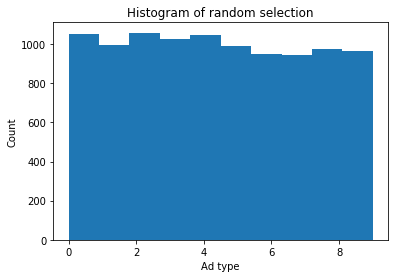

In [84]:
plt.hist(ads_selected)
plt.title('Histogram of random selection')
plt.xlabel('Ad type')
plt.ylabel('Count')



In [85]:
#Hence we use upper bound confidence algorithm
#Implementing UCB
#Step 1:

In [86]:
number_of_selections=[0]*d
sums_of_reward=[0]*d
ad_select=[]
total_reward_after_algorithm=0

In [87]:
number_of_selections

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [88]:
#Step 2:
# for each id we will calculate avg,delta,upper_bound for 10 type of ad
for n in range(0,N):
    #calcuate average and confidence
    ads=0
    max_upper_bound=0
    for i in range(0,d):
        if number_of_selections[i]>0:
            average_reward=sums_of_reward[i]/number_of_selections[i] # to find the average
            delta_i=math.sqrt(3/2*math.log(n+1)/number_of_selections[i]) # to find the delta
            upper_bound=average_reward+delta_i  # to find the upper bound
        
        else:
            upper_bound=1e400
        
        #to update the max_upper bound when ever the upper bound is calculated.
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ads=i # to hold or track the ad type
        
    ad_select.append(ads)
    number_of_selections[ads]=number_of_selections[ads]+1
    reward=data_ad.values[n,ads]
    sums_of_reward[ads]=sums_of_reward[ads]+reward
    total_reward_after_algorithm=total_reward_after_algorithm+reward

        
        


In [89]:
total_reward_after_algorithm

2178